#### OHLC와 캔들 차트

In [14]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from matplotlib import pyplot as plt
import requests

In [15]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'
print(url)

https://finance.naver.com/item/sise_day.nhn?code=068270


In [17]:
# 맨 뒤 페이지 읽어오기
with urlopen(url) as doc:
    html = bs(requests.get(url, headers={'User-agent' : 'Mozilla/5.0'}).text, 'lxml')
    pgrr = html.find("td", class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
    print(last_page)

388


In [64]:
# 전체 페이지 읽어오기
df = pd.DataFrame()
for page in range(1, int(last_page)+1):
    pg_url = '{}&page={}'.format(url,page)
    df = df.append(pd.read_html(requests.get(pg_url, headers = {'User-agent' : 'Mozilla/5.0'}).text)[0])

In [65]:
# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by = '날짜')

In [67]:
df = df.rename(columns= {'날짜' : 'Date', '종가' : 'close', '전일비' : 'diff', '시가' : 'open', '고가' : 'high', '저가' : 'low', '거래량' : 'volume'})
df

,Date,close,diff,open,high,low,volume
13,2021.02.03,347500.0,8000.0,357500.0,359500.0,338000.0,1922464.0
12,2021.02.04,341500.0,6000.0,345000.0,349500.0,337500.0,1099579.0
11,2021.02.05,341500.0,0.0,347500.0,355000.0,335000.0,1997418.0
10,2021.02.08,336000.0,5500.0,350000.0,351500.0,336000.0,784558.0
9,2021.02.09,328000.0,8000.0,336000.0,337500.0,328000.0,984780.0
5,2021.02.10,332000.0,4000.0,326500.0,332000.0,324500.0,734865.0
4,2021.02.15,333000.0,1000.0,340000.0,343500.0,333000.0,1188210.0
3,2021.02.16,325000.0,8000.0,335000.0,335500.0,324500.0,827534.0
2,2021.02.17,321500.0,3500.0,324500.0,329000.0,315500.0,951224.0
1,2021.02.18,314500.0,7000.0,320000.0,326500.0,314500.0,671084.0


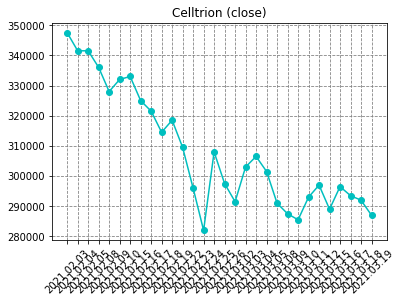

In [43]:
# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(df['date'],df['close'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

#### 캔들 차트 그리기
##### mplfinance 패키지 이용

In [55]:
import mplfinance as mpf
#mpf.plot(OHLC df)

In [71]:
df.index = pd.to_datetime(df['Date']) # date 칼럼을 DatetimeIndex로 변환 (이게 있어야 자동으로 데이터변환해줌)
df = df[['open', 'high', 'low', 'close', 'volume']]

In [76]:
df.columns # 컬럼은 date(인덱스) 뺀 컬럼만 남음.

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [73]:
df

,open,high,low,close,volume
Date,,,,,
2021-02-03,357500.0,359500.0,338000.0,347500.0,1922464.0
2021-02-04,345000.0,349500.0,337500.0,341500.0,1099579.0
2021-02-05,347500.0,355000.0,335000.0,341500.0,1997418.0
2021-02-08,350000.0,351500.0,336000.0,336000.0,784558.0
2021-02-09,336000.0,337500.0,328000.0,328000.0,984780.0
2021-02-10,326500.0,332000.0,324500.0,332000.0,734865.0
2021-02-15,340000.0,343500.0,333000.0,333000.0,1188210.0
2021-02-16,335000.0,335500.0,324500.0,325000.0,827534.0
2021-02-17,324500.0,329000.0,315500.0,321500.0,951224.0


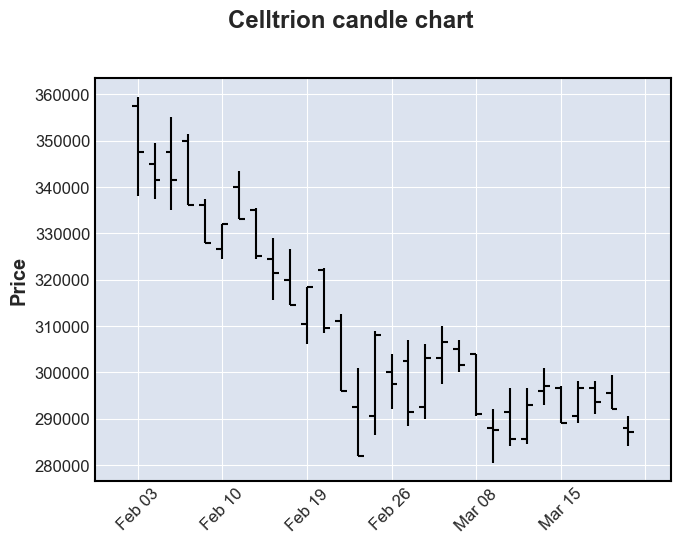

In [74]:
mpf.plot(df, title='Celltrion candle chart')

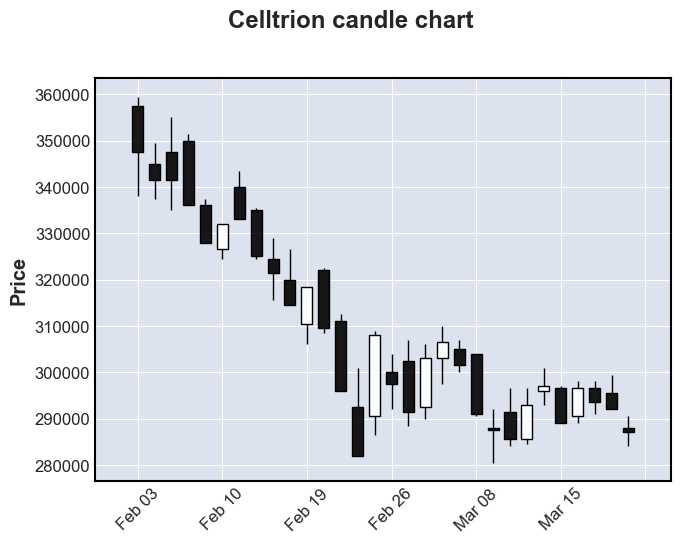

In [58]:
mpf.plot(df, title='Celltrion candle chart', type='candle')

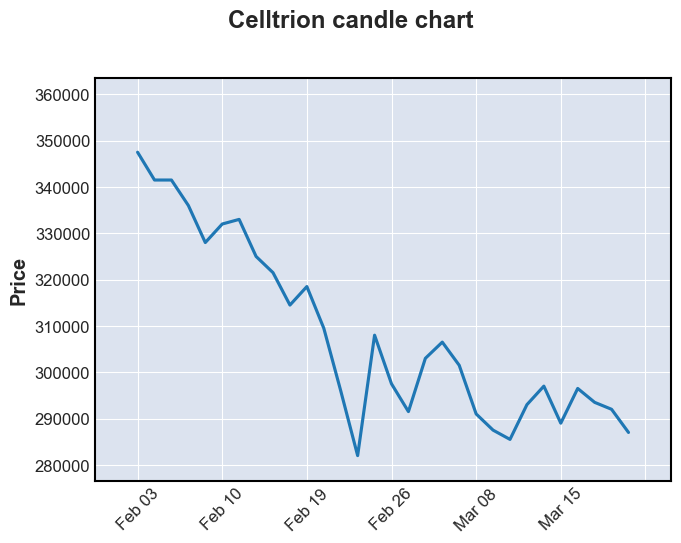

In [75]:
mpf.plot(df, title='Celltrion candle chart', type='line')

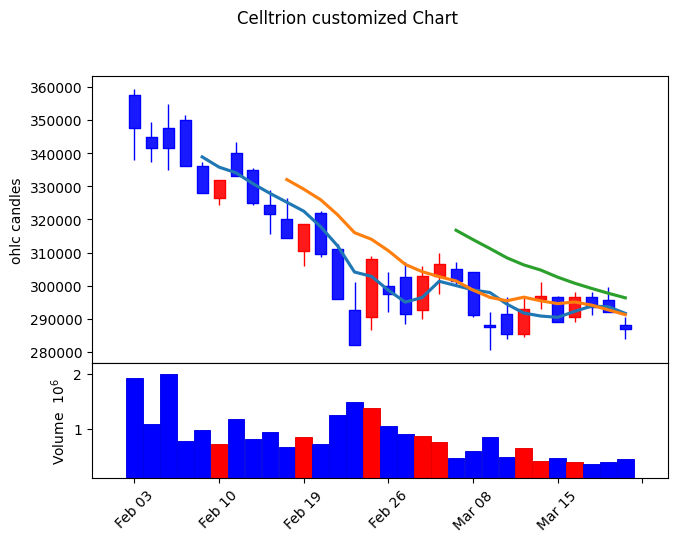

In [78]:
kwargs =dict(title = 'Celltrion customized Chart', type='candle', mav=(5,10,20), volume=True, ylabel = 'ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)